In [1]:
import numpy as np
import scipy.io as sio
import scipy.optimize as so
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font', family='Verdana')

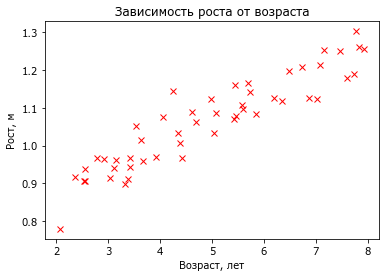

In [2]:
data = sio.loadmat('heights.mat')
Xdata = data['age']
ydata = data['height']

# Xp, Yp задают линию, которая будет отображена на графике поверх данных
def plot_data(X, y, Xp=None, yp=None):
    plt.plot(X, y, 'xr')
    if Xp is not None and yp is not None:
        plt.plot(Xp, yp, '-b')
    plt.xlabel('Возраст, лет')
    plt.ylabel('Рост, м')
    plt.title('Зависимость роста от возраста')
    plt.show()

plot_data(Xdata, ydata)


In [3]:
m, n = Xdata.shape

In [4]:
Xdata1 = np.concatenate([np.ones((m,1)), Xdata], axis=1)

In [5]:
n

1

In [6]:

def h(X, theta):
    # Проверки входных данных
    assert len(X.shape) == 2, "X — матрица?"
    assert X.shape[1] == n+1, "Неверный размер матрицы X. Забыли столбец из 1?" 
    assert theta.shape == (n+1, 1), "Неверный размер матрицы theta"
    
    # ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
    return np.dot(X, theta)
    ###

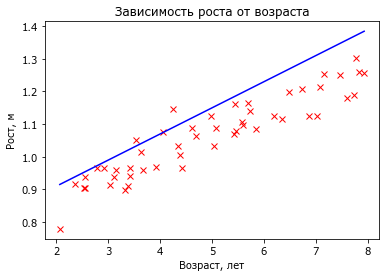

In [7]:
theta = np.array([[0.75], [0.08]])
yp = h(Xdata1, theta) # Предсказанные значения
plot_data(Xdata, ydata, Xdata, yp)

In [8]:
theta_norm = np.linalg.inv(Xdata1.T.dot(Xdata1)).dot(Xdata1.T).dot(ydata)


[[0.75016254]
 [0.06388117]]


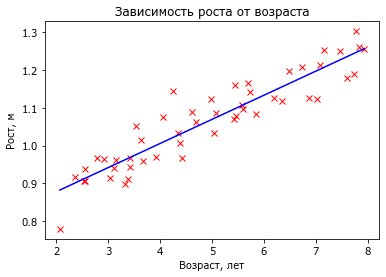

In [9]:
print (theta_norm)
yp = h(Xdata1, theta_norm) # Предсказанные значения
plot_data(Xdata, ydata, Xdata, yp)

In [10]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [11]:

import pandas as pd

import scipy.optimize as opt 

In [19]:
def J(theta, X, y):
    # Проверки входных данных
    assert len(X.shape) == 2, "X — матрица?"
    assert X.shape[1] == n+1, "Неверный размер матрицы X. Забыли столбец из 1?" 
    assert X.shape[0] == y.shape[0], "Разное количество выходных и входных переменных"
    assert theta.shape == (n+1, 1), "Неверный размер матрицы theta"
    
    Jcost = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) 
        + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return Jcost
    ###

In [20]:
n

1

In [21]:

def dJ(theta, X, y):
    # Проверки входных данных
    assert len(X.shape) == 2, "X — матрица?"
    assert X.shape[1] == n+1, "Неверный размер матрицы X. Забыли столбец из 1?" 
    assert X.shape[0] == y.shape[0], "Разное количество выходных и входных переменных"
    assert theta.shape == (n+1, 1), "Неверный размер матрицы theta"
    
    # ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))
    ###

In [22]:
eps = 0.01
# НАЙДИТЕ ОПТИМАЛЬНОЕ ЗНАЧЕНИЕ КОЭФФИЦИЕНТА alpha
alpha = 0.00000001

In [26]:

k, Kmax = 0, 1000000
norms = []

# Инициализация
theta_grad = np.zeros((n+1, 1))
while True:
    d = dJ(theta_grad, Xdata1, ydata) # Текущее значение градиента
    
    norm = np.linalg.norm(d)
    norms.append(norm)
    k += 1
    if k > Kmax or norm < eps: break

    # Один шаг градиентного спуска
    # ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
    theta_grad = theta_grad - (1/m) * alpha * (Xdata1.T.dot(norm - ydata))
    ###

In [27]:
norms

[3.0203515316864187,
 3.0203522079281573,
 3.020352884170134,
 3.0203535604123486,
 3.0203542366548004,
 3.0203549128974907,
 3.0203555891404203,
 3.020356265383588,
 3.0203569416269946,
 3.020357617870638,
 3.020358294114521,
 3.0203589703586418,
 3.020359646603,
 3.020360322847598,
 3.0203609990924334,
 3.0203616753375075,
 3.0203623515828193,
 3.0203630278283704,
 3.020363704074159,
 3.020364380320187,
 3.020365056566451,
 3.0203657328129565,
 3.0203664090596973,
 3.0203670853066784,
 3.0203677615538975,
 3.020368437801354,
 3.02036911404905,
 3.020369790296983,
 3.0203704665451556,
 3.020371142793565,
 3.0203718190422135,
 3.0203724952911,
 3.0203731715402253,
 3.0203738477895894,
 3.020374524039191,
 3.0203752002890307,
 3.0203758765391093,
 3.020376552789427,
 3.0203772290399815,
 3.020377905290774,
 3.020378581541806,
 3.0203792577930755,
 3.020379934044583,
 3.02038061029633,
 3.020381286548315,
 3.020381962800538,
 3.020382639052999,
 3.020383315305699,
 3.0203839915586372,
 3

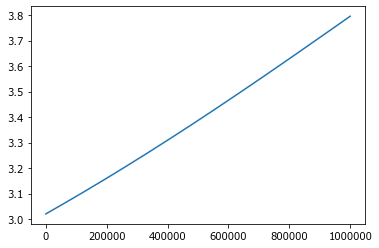

In [28]:
plt.plot(norms)
plt.show()

[[0.02329167]
 [0.11280997]]


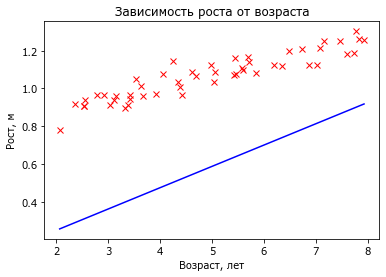

In [32]:
print (theta_grad)
yp = h(Xdata1, theta_grad) # Предсказанные значения
plot_data(Xdata, ydata, Xdata, yp)